In [1]:
%matplotlib inline

In [2]:
from itertools import batched
import numpy as np

In [3]:
testlines = '''seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4'''.splitlines()

In [4]:
with open('day5input.txt') as fp:
    data = fp.read().splitlines()

In [5]:
def seeds_and_maps(lines):
    seeds = [int(s) for s in lines[0][6:].split()]
    maplines = lines[2:]
    maps = {}
    curmap = None
    for line in maplines:
        if line == '':
            continue
        elif 'map' in line:
            name = line[:-5]
            frm, _, to = name.split('-')
            curmap = {'from': frm, 'to': to, 'rules': []}
            maps[frm] = curmap
        else:
            # it's a rule
            dest, src, num = line.split()
            curmap['rules'].append((int(dest), int(src), int(num)))
    return seeds, maps
            

In [6]:
def convert(id, map):
    # sift through all of the rules for this map and see if any apply
    for dest, src, num in map['rules']:
        if src <= id < src + num:
            return dest + (id - src)
    # if not, then id maps to id
    return id

In [7]:
testseeds, testmaps = seeds_and_maps(testlines)

In [8]:
testmaps

{'seed': {'from': 'seed', 'to': 'soil', 'rules': [(50, 98, 2), (52, 50, 48)]},
 'soil': {'from': 'soil',
  'to': 'fertilizer',
  'rules': [(0, 15, 37), (37, 52, 2), (39, 0, 15)]},
 'fertilizer': {'from': 'fertilizer',
  'to': 'water',
  'rules': [(49, 53, 8), (0, 11, 42), (42, 0, 7), (57, 7, 4)]},
 'water': {'from': 'water',
  'to': 'light',
  'rules': [(88, 18, 7), (18, 25, 70)]},
 'light': {'from': 'light',
  'to': 'temperature',
  'rules': [(45, 77, 23), (81, 45, 19), (68, 64, 13)]},
 'temperature': {'from': 'temperature',
  'to': 'humidity',
  'rules': [(0, 69, 1), (1, 0, 69)]},
 'humidity': {'from': 'humidity',
  'to': 'location',
  'rules': [(60, 56, 37), (56, 93, 4)]}}

In [9]:
def follow_seed(seed, maps):
    map = maps['seed']
    id = convert(seed, map)
    while map['to'] != 'location':
        map = maps[map['to']]
        id = convert(id, map)
    return id

In [10]:
follow_seed(79, testmaps), follow_seed(14, testmaps), follow_seed(55, testmaps), follow_seed(13, testmaps)

(82, 43, 86, 35)

In [11]:
def part1(lines):
    seeds, maps = seeds_and_maps(lines)
    return min(follow_seed(seed, maps) for seed in seeds)

In [12]:
part1(testlines)

35

In [13]:
part1(data)

175622908

## Part 2

In [14]:
import matplotlib.pyplot as plt

In [15]:
seed_ranges = [b for b in batched(testseeds, 2)]

In [16]:
seed_ranges

[(79, 14), (55, 13)]

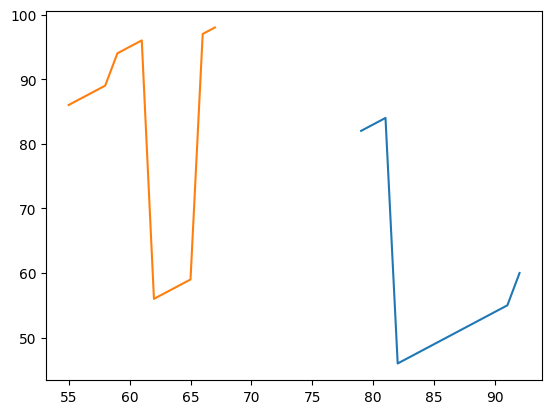

In [17]:
for start, num in seed_ranges:
    seeds = list(range(start, start+num))
    y = [follow_seed(seed, testmaps) for seed in seeds]
    plt.plot(seeds, y, '-')

In [18]:
dataseeds, datamaps = seeds_and_maps(data)

In [19]:
seed_ranges = [b for b in batched(dataseeds, 2)]
seed_ranges

[(1482445116, 339187393),
 (3210489476, 511905836),
 (42566461, 51849137),
 (256584102, 379575844),
 (3040181568, 139966026),
 (4018529087, 116808249),
 (2887351536, 89515778),
 (669731009, 806888490),
 (2369242654, 489923931),
 (2086168596, 82891253)]

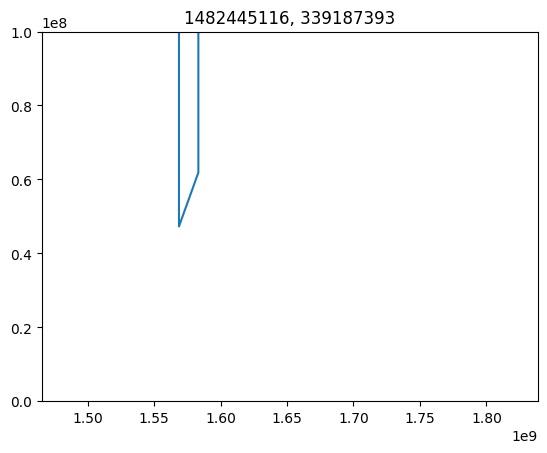

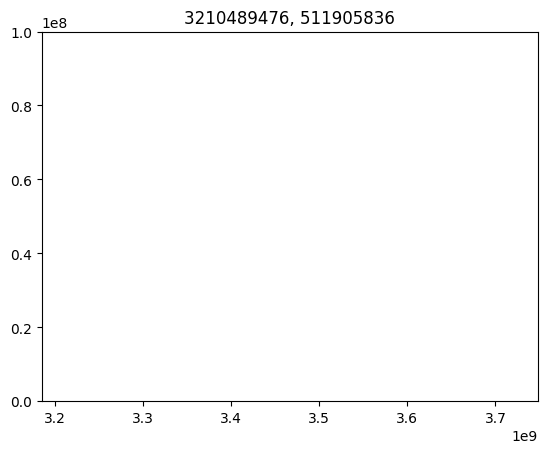

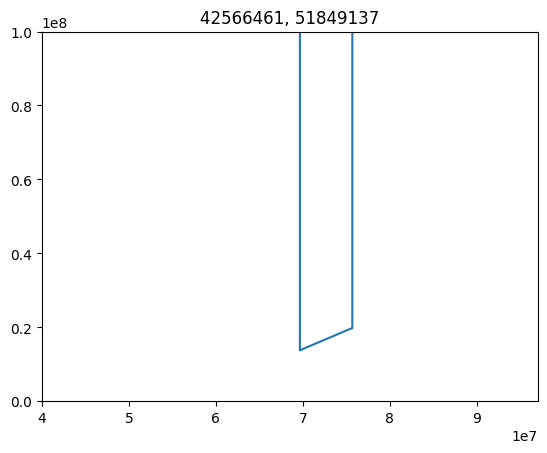

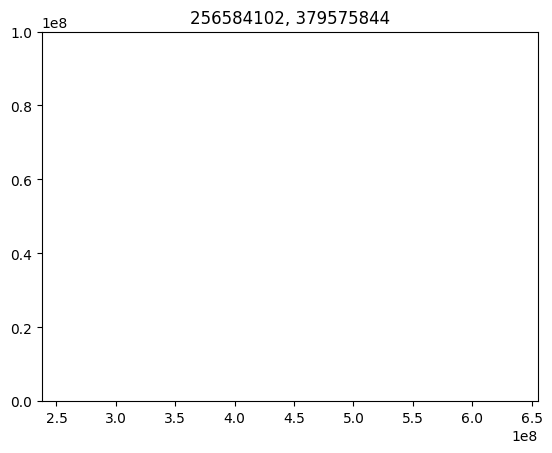

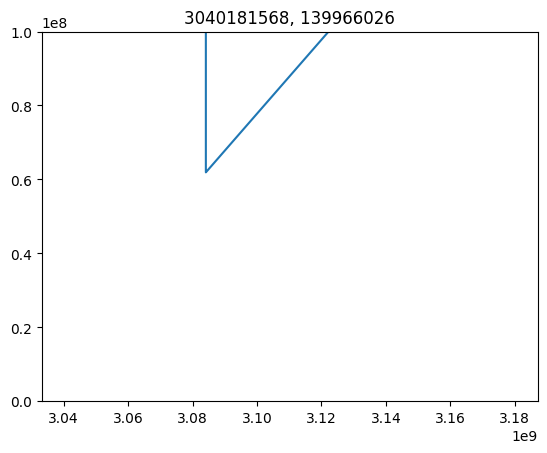

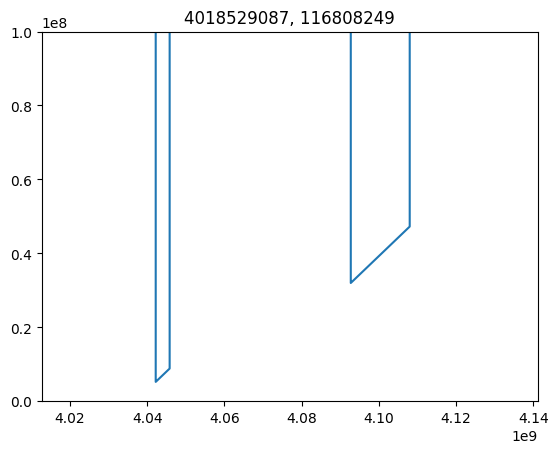

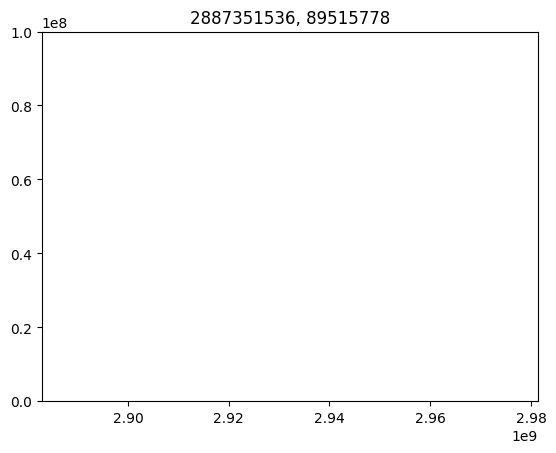

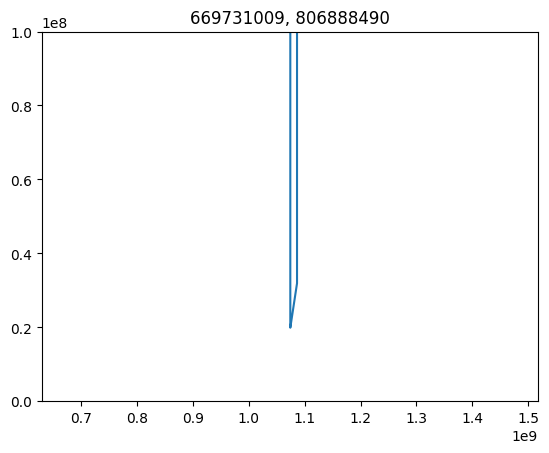

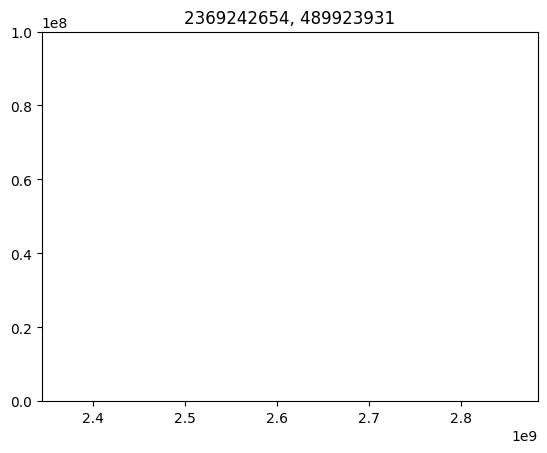

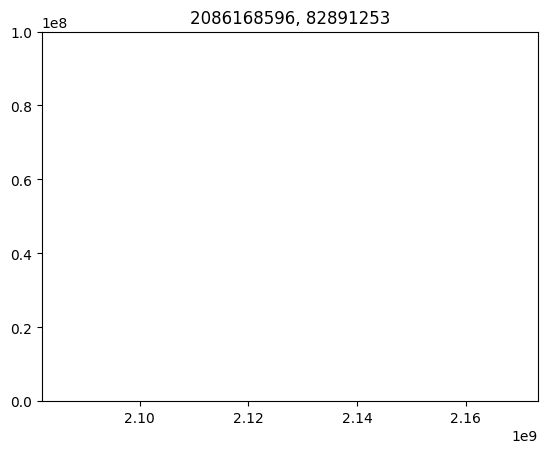

In [20]:
for start, num in seed_ranges:
    seeds = list(range(start, start+num, int(num/10000)))
    y = [follow_seed(seed, datamaps) for seed in seeds]
    fig, ax = plt.subplots()
    ax.plot(seeds, y, '-')
    ax.set_title(f"{start}, {num}")
    ax.set_ylim(0, 1e8)

In [21]:
seed_ranges

[(1482445116, 339187393),
 (3210489476, 511905836),
 (42566461, 51849137),
 (256584102, 379575844),
 (3040181568, 139966026),
 (4018529087, 116808249),
 (2887351536, 89515778),
 (669731009, 806888490),
 (2369242654, 489923931),
 (2086168596, 82891253)]

(0.0, 50000000.0)

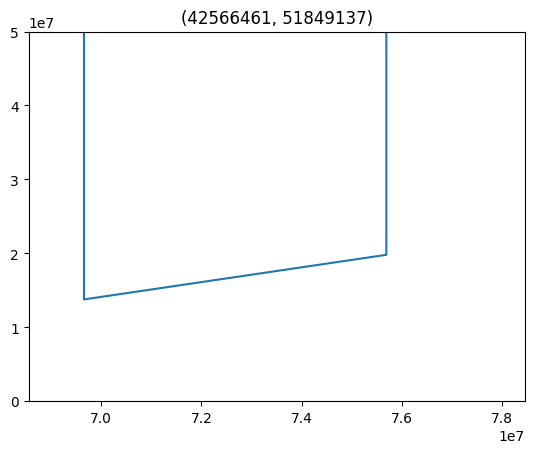

In [22]:
seed_range = seed_ranges[2]
seeds = list(range(int(6.9e7), int(7.8e7), 100))
y = [follow_seed(seed, datamaps) for seed in seeds]
fig, ax = plt.subplots()
ax.plot(seeds, y, '-')
ax.set_title(f"{seed_range}")
ax.set_ylim(0, 0.5e8)

(0.0, 50000000.0)

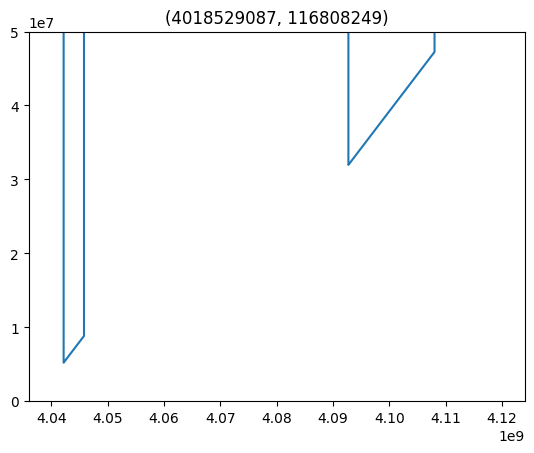

In [23]:
seed_range = seed_ranges[5]
seeds = list(range(int(4.04e9), int(4.12e9), 100))
y = [follow_seed(seed, datamaps) for seed in seeds]
fig, ax = plt.subplots()
ax.plot(seeds, y, '-')
ax.set_title(f"{seed_range}")
ax.set_ylim(0, 0.5e8)

(0.0, 50000000.0)

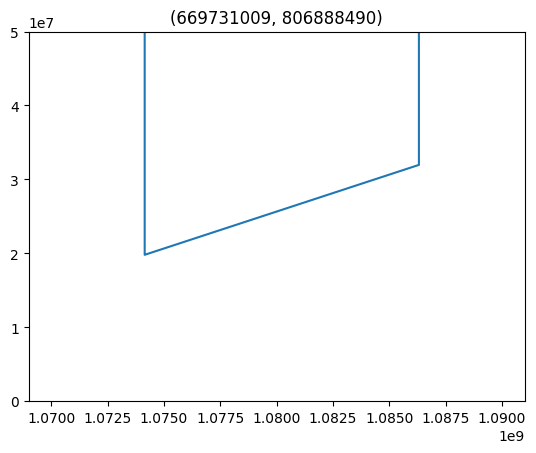

In [24]:
seed_range = seed_ranges[7]
seeds = list(range(int(1.07e9), int(1.09e9), 100))
y = [follow_seed(seed, datamaps) for seed in seeds]
fig, ax = plt.subplots()
ax.plot(seeds, y, '-')
ax.set_title(f"{seed_range}")
ax.set_ylim(0, 0.5e8)

(4042000000.0, 4042600000.0)

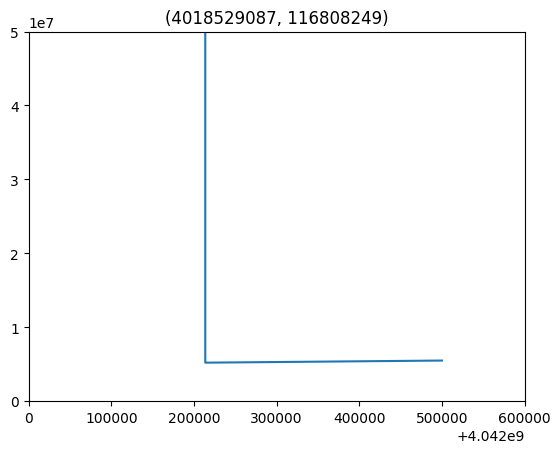

In [25]:
seed_range = seed_ranges[5]
seeds = list(range(int(4.042e9), int(4.0425e9), 10))
y = [follow_seed(seed, datamaps) for seed in seeds]
fig, ax = plt.subplots()
ax.plot(seeds, y, '-')
ax.set_title(f"{seed_range}")
ax.set_ylim(0, 0.5e8)
ax.set_xlim(4.042e9, 4.0426e9)

In [26]:
seeds = list(range(int(4.042e9)+200000, int(4.042e9)+230000))
y = [follow_seed(seed, datamaps) for seed in seeds]


In [27]:
miny = min(y)
miny

5200543